# **Handwritten_Digits_Recognition**

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,jaccard_score,log_loss
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

## **Exploration Data**

In [3]:
url='pendigits_txt.csv'
df=pd.read_csv(url,sep=',')
df.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [4]:
print(df.shape)
print(df.isnull().sum())

(10992, 17)
input1     0
input2     0
input3     0
input4     0
input5     0
input6     0
input7     0
input8     0
input9     0
input10    0
input11    0
input12    0
input13    0
input14    0
input15    0
input16    0
class      0
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   input1   10992 non-null  int64
 1   input2   10992 non-null  int64
 2   input3   10992 non-null  int64
 3   input4   10992 non-null  int64
 4   input5   10992 non-null  int64
 5   input6   10992 non-null  int64
 6   input7   10992 non-null  int64
 7   input8   10992 non-null  int64
 8   input9   10992 non-null  int64
 9   input10  10992 non-null  int64
 10  input11  10992 non-null  int64
 11  input12  10992 non-null  int64
 12  input13  10992 non-null  int64
 13  input14  10992 non-null  int64
 14  input15  10992 non-null  int64
 15  input16  10992 non-null  int64
 16  class    10992 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
input1,10992.0,38.814320,34.257783,0.0,6.0,32.0,65.0,100.0
input2,10992.0,85.120269,16.218571,0.0,76.0,89.0,100.0,100.0
input3,10992.0,40.605622,26.342984,0.0,20.0,40.0,58.0,100.0
input4,10992.0,83.774199,19.163646,0.0,72.0,91.0,100.0,100.0
input5,10992.0,49.770378,34.100515,0.0,18.0,53.0,78.0,100.0
input6,10992.0,65.573144,26.996688,0.0,49.0,71.0,86.0,100.0
input7,10992.0,51.220251,30.576881,0.0,28.0,53.5,74.0,100.0
input8,10992.0,44.498999,29.906104,0.0,23.0,43.0,64.0,100.0
input9,10992.0,56.868541,34.135530,0.0,29.0,60.0,89.0,100.0
input10,10992.0,33.695961,27.251548,0.0,7.0,33.0,54.0,100.0


In [7]:
# sumary of dataset
def summary(df,pred=None):
    obs=df.shape[0]
    Types=df.dtypes
    Counts=df.apply(lambda x:x.count())
    Min=df.min()
    Max=df.max()
    Uniques=df.apply(lambda x : x.unique().shape[0])
    Nulls=df.apply(lambda x : x.isnull().sum())
    print('Data Shape:',df.shape)
    
    if pred is None:
        cols=['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str=pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)
    str.columns=cols
    print('------------------------------\nData Types:')
    print(str.Types.value_counts())
    print('----------------------------')
    return str

summary(df)

Data Shape: (10992, 17)
------------------------------
Data Types:
Types
int64    17
Name: count, dtype: int64
----------------------------


,Types,Counts,Uniques,Nulls,Min,Max
class,int64,10992,10,0,0,9
input1,int64,10992,101,0,0,100
input10,int64,10992,101,0,0,100
input11,int64,10992,101,0,0,100
input12,int64,10992,101,0,0,100
input13,int64,10992,101,0,0,100
input14,int64,10992,101,0,0,100
input15,int64,10992,101,0,0,100
input16,int64,10992,101,0,0,100
input2,int64,10992,96,0,0,100


In [8]:
# Duplicated
def verificar_columnas_duplicadas(df, return_columns=False):
    """
    Verifica si un DataFrame tiene columnas duplicadas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame que se desea verificar.
    return_columns (bool): Si es True, devuelve una lista de los nombres de columnas duplicadas.
    
    Retorna:
    bool: True si hay columnas duplicadas, False en caso contrario.
    list: Opcionalmente, una lista con los nombres de las columnas duplicadas.
    """
    # Obtener una Serie con la cuenta de cada columna
    columnas_duplicadas = df.columns[df.columns.duplicated()]
    
    if return_columns:
        return len(columnas_duplicadas) > 0, columnas_duplicadas.tolist()
    else:
        return len(columnas_duplicadas) > 0

# Verificar si hay columnas duplicadas
hay_duplicados, columnas_duplicadas = verificar_columnas_duplicadas(df, return_columns=True)

print("¿Hay columnas duplicadas?", hay_duplicados)
print("Columnas duplicadas:", columnas_duplicadas)


¿Hay columnas duplicadas? False
Columnas duplicadas: []


In [9]:
# Missing Values 
def missing_values(df):
    missing_count=df.isnull().sum()
    value_count=df.isnull().count()
    missing_percentage=round(missing_count/value_count * 100, 2)
    missing_df=pd.DataFrame({"Count":missing_count,"percentage":missing_percentage})
    return missing_df
missing_values(df)

,Count,percentage
input1,0,0.0
input2,0,0.0
input3,0,0.0
input4,0,0.0
input5,0,0.0
input6,0,0.0
input7,0,0.0
input8,0,0.0
input9,0,0.0
input10,0,0.0


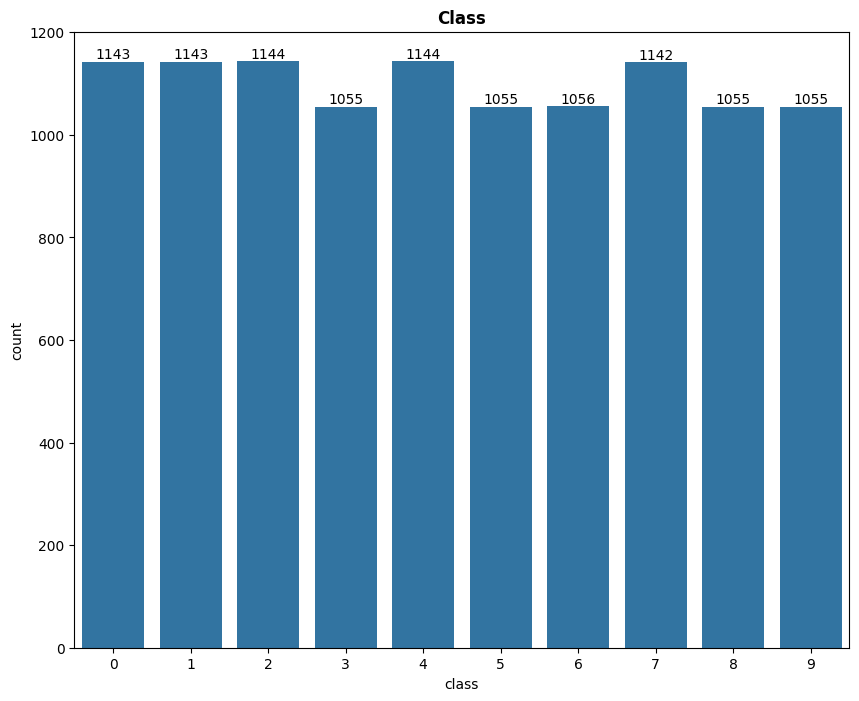

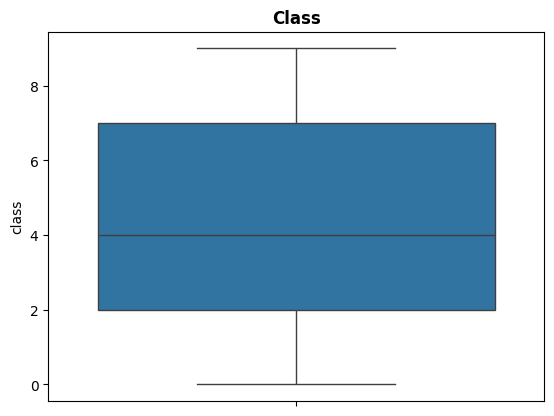

In [10]:
plt.figure(figsize=(10,8))
ax=sns.countplot(data=df,x='class')
ax.bar_label(ax.containers[0])
plt.title('Class',fontsize=12,weight='bold')
plt.show()

sns.boxplot(data=df,y='class')
plt.title('Class',fontsize=12,weight='bold')
plt.show()

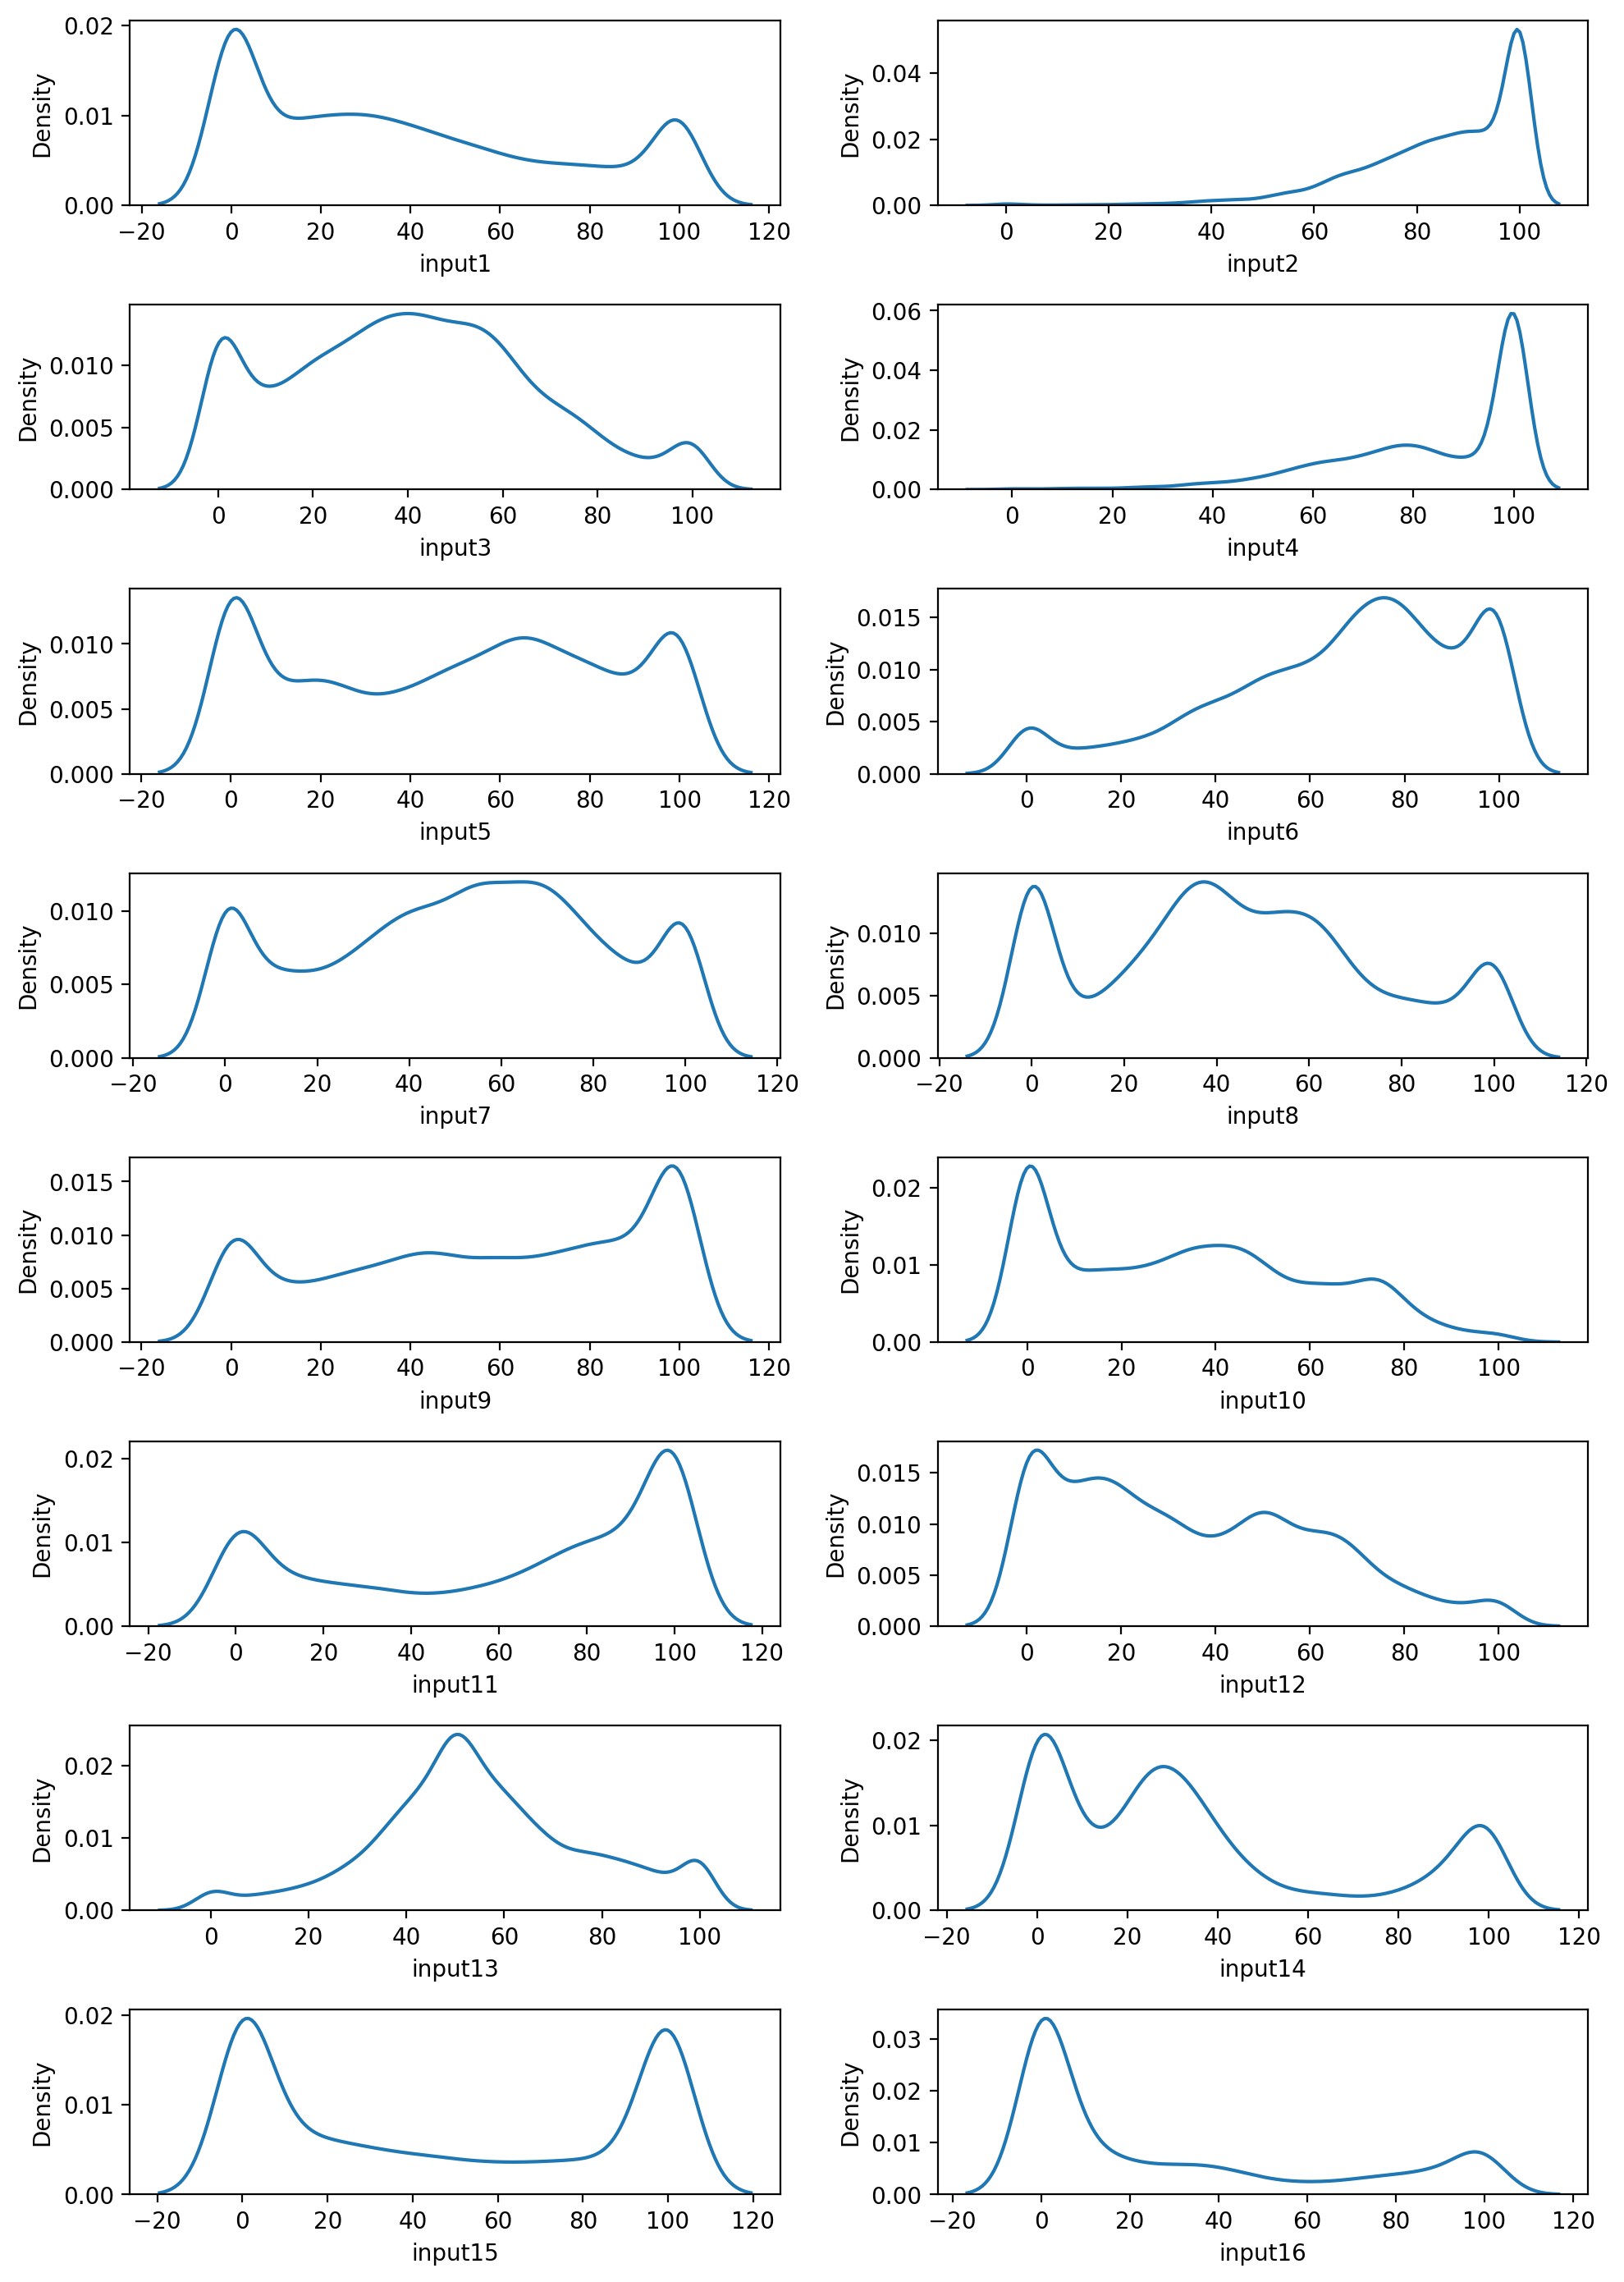

In [11]:
# Analize the Inputs
fig=plt.figure(figsize=(10,14),dpi=200)
for i , col in enumerate(df.columns[:-1]):
    plt.subplot(8,2,i+1)
    sns.kdeplot(data=df[col])
plt.tight_layout()

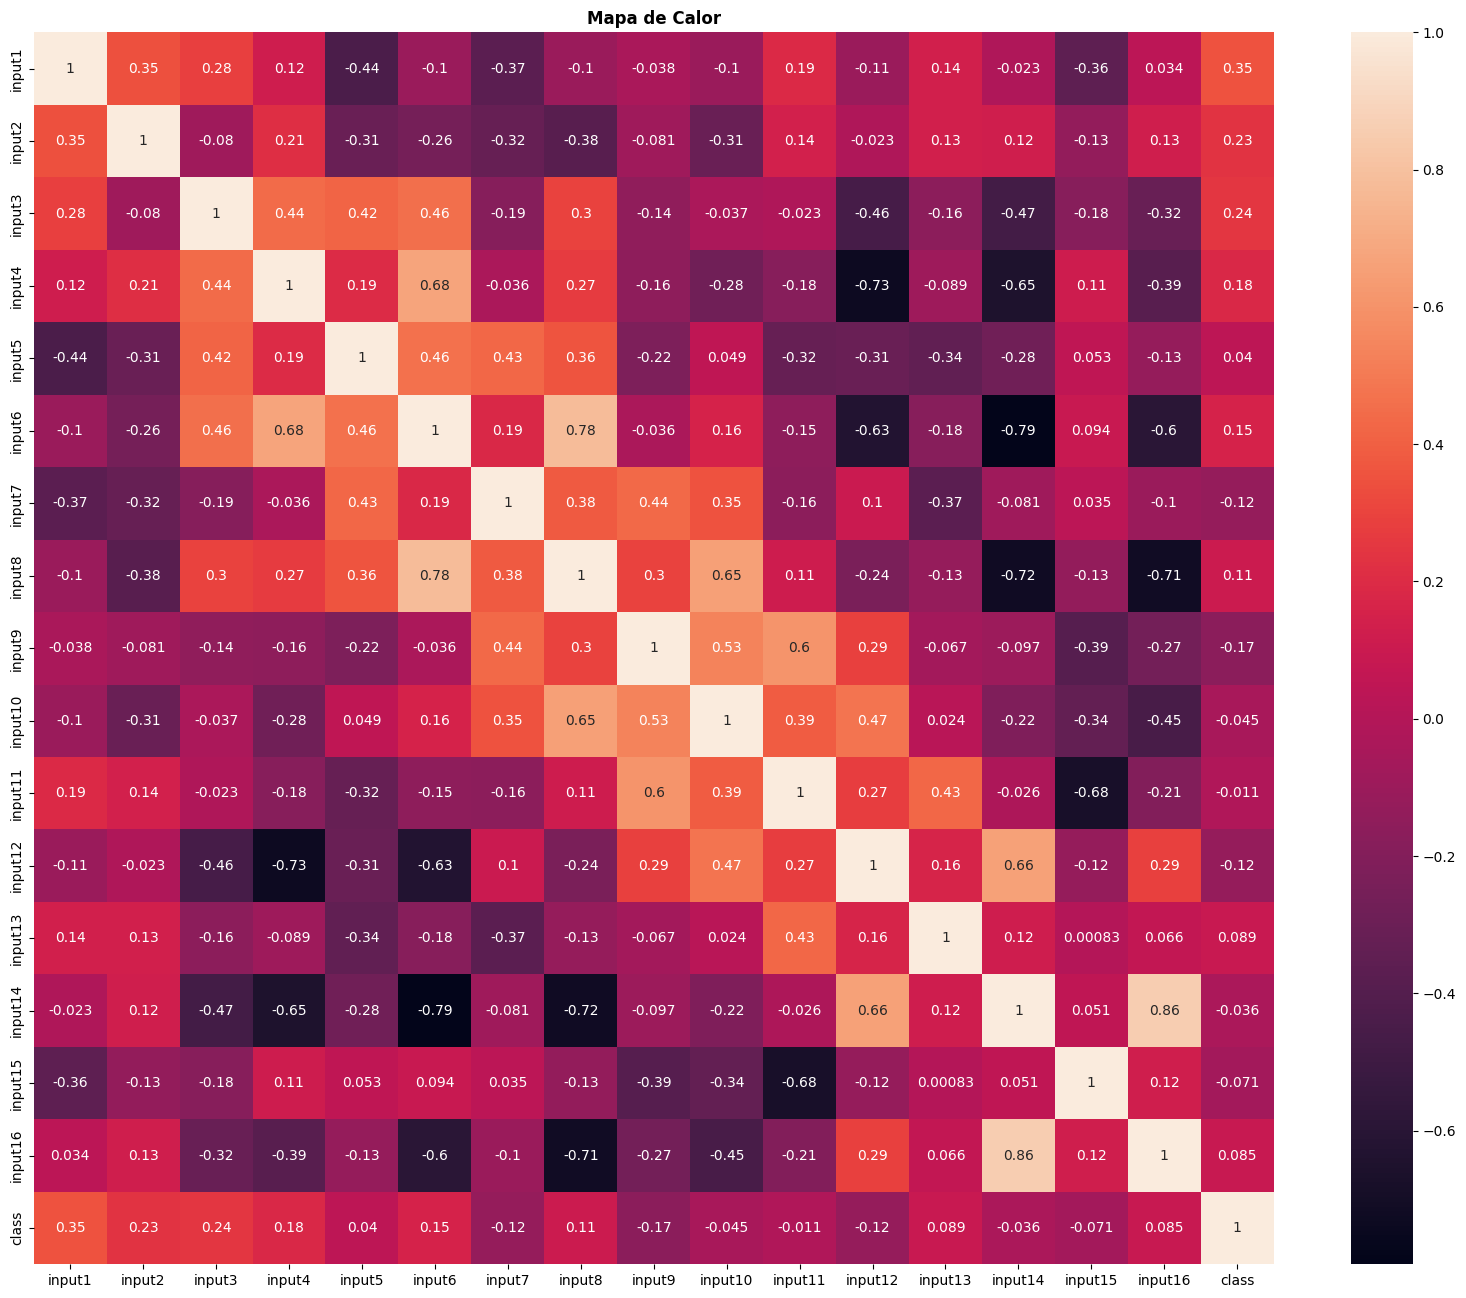

In [12]:
plt.figure(figsize=(20,16))
sns.heatmap(data=df.corr(),annot=True)
plt.title('Mapa de Calor',fontsize=12,weight='bold')
plt.show()

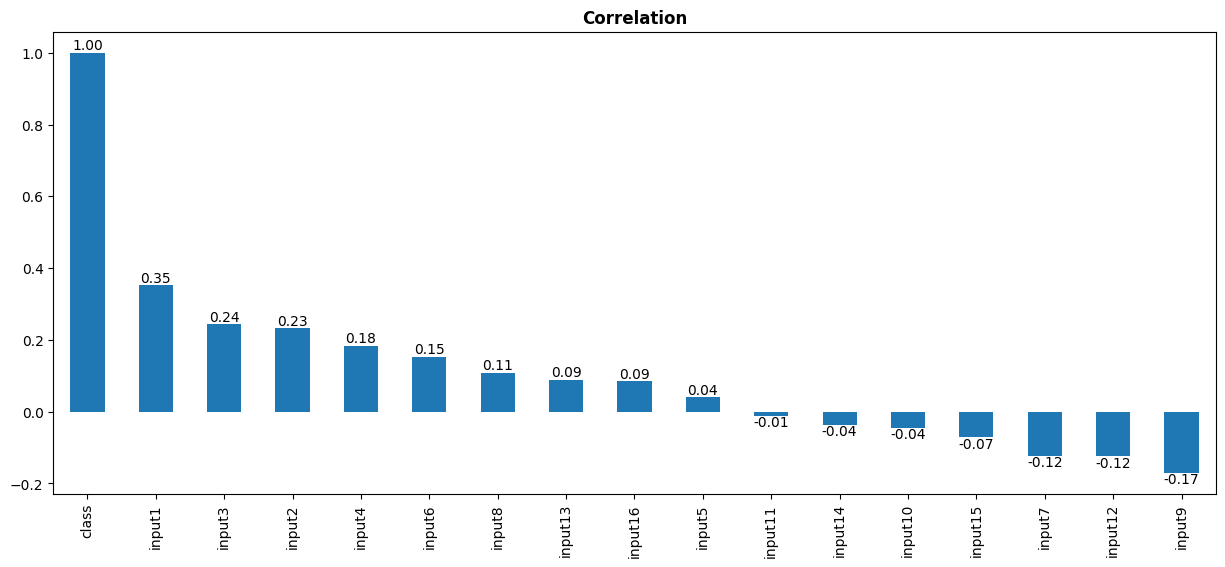

In [13]:
correlation_matrix=df.corr()
price_corr=correlation_matrix['class'].sort_values(ascending=False)
ax =  price_corr.plot(kind='bar',figsize=(15,6))
ax.set_title('Correlation',fontsize=12,weight='bold')
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.show()

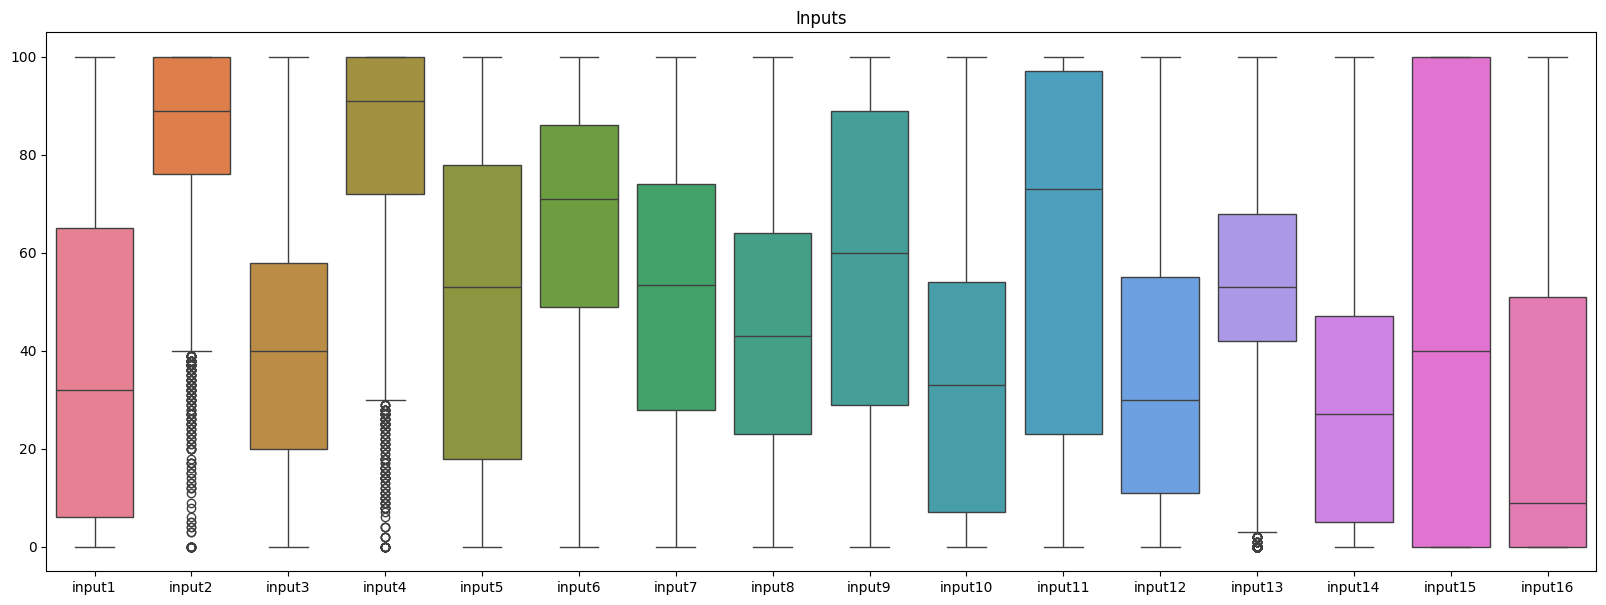

In [14]:
inputs=['input1', 'input2', 'input3', 'input4', 'input5', 'input6', 'input7',
       'input8', 'input9', 'input10', 'input11', 'input12', 'input13',
       'input14', 'input15', 'input16']
plt.figure(figsize=(20,7))
sns.boxplot(data=df[inputs])
plt.title('Inputs')
plt.show()

* Hay presencia de Outliers en los inputs 2 y 4.

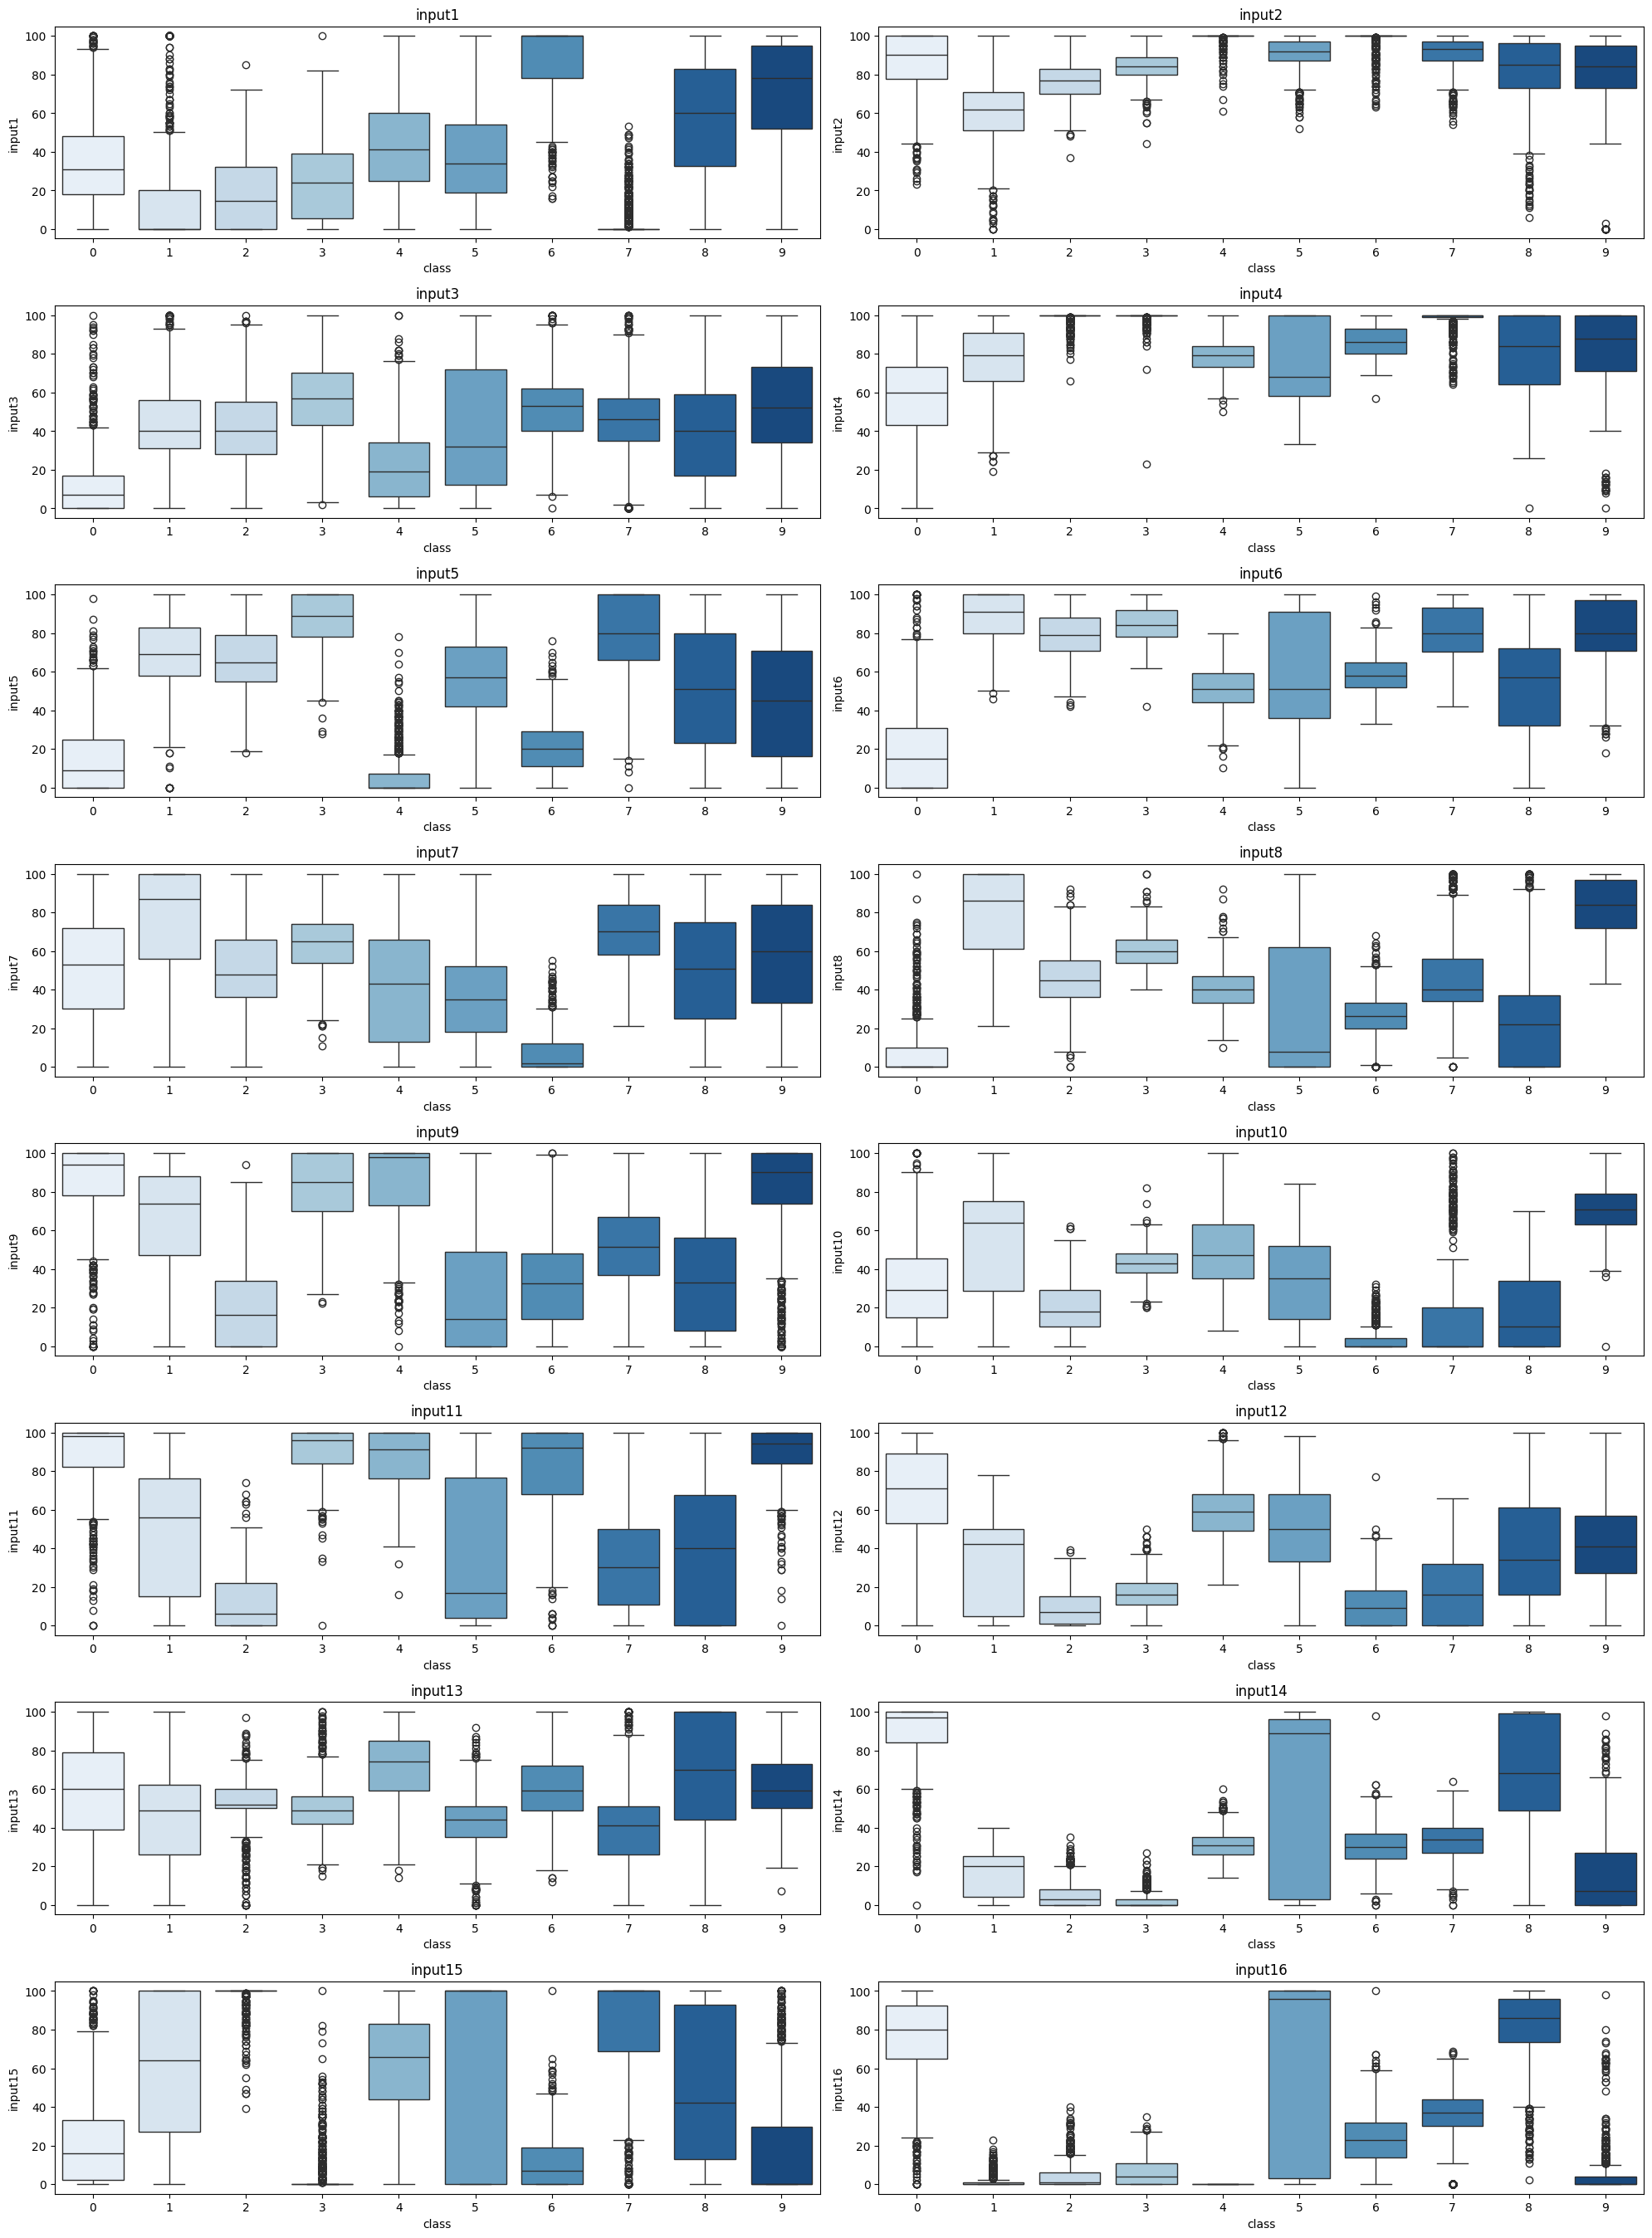

In [15]:
plt.figure(figsize=(20, 30))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(9, 2, i)
    plt.title(col)
    sns.boxplot(x='class', y=col, data=df,palette='Blues')
plt.tight_layout()  
plt.show()

## **Machine Learning**

In [16]:
scaler=MinMaxScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df[inputs]),columns=inputs)
df_scaled['class']=df['class']
df_scaled.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,0.47,1.00,0.27,0.81,0.57,0.37,0.26,0.00,0.00,0.23,0.56,0.53,1.00,0.90,0.40,0.98,8
1,0.00,0.89,0.27,1.00,0.42,0.75,0.29,0.45,0.15,0.15,0.37,0.00,0.69,0.02,1.00,0.06,2
2,0.00,0.57,0.31,0.68,0.72,0.90,1.00,1.00,0.76,0.75,0.50,0.51,0.28,0.25,0.16,0.00,1
3,0.00,1.00,0.07,0.92,0.05,0.68,0.19,0.45,0.86,0.34,1.00,0.45,0.74,0.23,0.67,0.00,4
4,0.00,0.67,0.49,0.83,1.00,1.00,0.81,0.80,0.60,0.60,0.40,0.40,0.33,0.20,0.47,0.00,1


In [17]:
# Train Test Split
X=df_scaled.drop('class',axis=1)
y=df_scaled['class']
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,shuffle=True,random_state=100)


### **Suport Vector Machine**

In [23]:
model_svc=SVC()
params={
    'kernel':['rbf'],
    'random_state':[50,100],
    'probability':[True,False],
    'gamma':['scale', 'auto']
}
# hiperparametros
grid_search=GridSearchCV(model_svc,params,cv=5)
grid_search.fit(X_train,y_train)
#The best hiperparametros
print(grid_search.best_params_)


{'gamma': 'scale', 'kernel': 'rbf', 'probability': True, 'random_state': 50}


In [26]:
model_svc=SVC(**grid_search.best_params_)
model_svc.fit(X_train,y_train)

SVC(probability=True, random_state=50)

In [27]:
y_pred=model_svc.predict(X_test)
print("Accuracy Score :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy Score : 99.68 %


In [31]:
def calculate_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred,average='micro')
    prec = precision_score(y_true, y_pred,average='micro')
    rec = recall_score(y_true, y_pred,average='micro')
    jacc=jaccard_score(y_true,y_pred,average='micro')
    return {'Accuracy': acc, 'F1 Score': f1, 'Precision': prec, 'Recall': rec,'Jaccard':jacc}
calculate_metrics(y_test,y_pred)

{'Accuracy': 0.9968167348794906,
 'F1 Score': 0.9968167348794906,
 'Precision': 0.9968167348794906,
 'Recall': 0.9968167348794906,
 'Jaccard': 0.9936536718041704}

### **RandomForestClassifier**